<a href="https://colab.research.google.com/github/rfprates/case_escolha_imovel_aluguel/blob/main/Case_aluguel_imovel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case - Escolha de imóvel para aluguel

## Introdução

Um casal de brasileiros está de mudança para a Europa, especificamente para a região da Península Hibérica (Portugal e Espanha). Por indicações de agências imobiliárias internacionais e amigos, a preferência para residir se restringiu a duas cidades, Porto e Barcelona.

Após pesquisas rápidas em bancos de dados imobiliários dos apartamentos e casas disponíveis em ambas as cidades, o casal unificou todas as informações em um dataset único.

## Objetivo do Projeto

O objetivo deste projeto é selecionar, dentro todos os imóveis disponíveis para locação, aquele que tem o melhor custo benefício e que atenda todas as demandas do casal.

## Premissas do Projeto

* Gastar até 4000,00 euros com despesas totais do imóvel alugado;
* É necessário um imóvel que aceite animais de extimação;
* Apartamentos com 2 ou 3 quartos, pois o casal trabalha em modelo home-office, e portanto pretendem fazer um escritório de trabalho com um dos quartos;
* Preferência para imóveis em andares mais elevados.

## Análise Descritiva dos Dados

In [ ]:
import pandas as pd

In [ ]:
aluguel_casa = pd.read_excel('/content/houses_rent.xlsx')

Acessando-se as 5 primeiras linhas do dataset,

In [ ]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


Com o cabeçalho do dataset exposto acima, podemos verificar as colunas e o tipo de informações que cada uma retorna:

* index = número das linhas do dataset;
* city = cidade (Porto ou Barcelona);
* area = área dos imóveis;
* rooms = quantidade de quartos;
* bathroom = quantidade de banheiros;
* parking spaces = quantidade de vagas de garagem;
* floor = andar em que se encontra o imóvel;
* animal = aceita animais de estimação ou não;
* furniture = imóvel mobiliado ou não;
* rent amount = preço do aluguel;
* property tax = valor do condomínio;
* fire insurance = valor do seguro de incêndio;
* total = soma de todos os gastos (aluguel, condomínio e seguro)

Por questão de boas práticas, substitui-se os espaços no nome das colunas pelo underline,

In [ ]:
aluguel_casa = aluguel_casa.rename(columns = lambda coluna: '_'.join(coluna.split(' ')))

In [ ]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


Verifica-se agora os tipos de dados de cada coluna,

In [ ]:
aluguel_casa.dtypes

index              int64
city              object
area               int64
rooms              int64
bathroom           int64
parking_spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent_amount        int64
property_tax       int64
fire_insurance     int64
total              int64
dtype: object

Convertendo-se os dados da coluna 'rent_amount' para o tipo float,

In [ ]:
aluguel_casa['rent_amount'] = aluguel_casa['rent_amount'].astype('float')

In [ ]:
aluguel_casa.dtypes

index               int64
city               object
area                int64
rooms               int64
bathroom            int64
parking_spaces      int64
floor              object
animal             object
furniture          object
hoa                object
rent_amount       float64
property_tax        int64
fire_insurance      int64
total               int64
dtype: object

Convertendo-se agora as colunas 'property_tax', 'fire_insurance' e 'total' também para o tipo 'float' :

In [ ]:
aluguel_casa = aluguel_casa.astype({'property_tax':'float', 'fire_insurance':'float', 'total':'float'})

In [ ]:
aluguel_casa.dtypes

index               int64
city               object
area                int64
rooms               int64
bathroom            int64
parking_spaces      int64
floor              object
animal             object
furniture          object
hoa                object
rent_amount       float64
property_tax      float64
fire_insurance    float64
total             float64
dtype: object

Acessando-se mais informações do dataset :

In [ ]:
aluguel_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   int64  
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_spaces  6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 665.1+ KB


 Ao analisar-se o retorno acima, é possível observar que o dataset não apresenta dados nulos: todas as colunas tem exatamente 6080 entradas de dados não nulos, assim como está descrito no RangeIndex: 6080 entradas.

Avaliou-se então as estatísticas descritivas deste dataset, somente para as colunas com dados numéricos do dataset, exceto a coluna 'index' que só representa os números das linhas.

In [ ]:
columns = []
for coluna in aluguel_casa.columns:
  if aluguel_casa[coluna].dtypes != 'object' and coluna != 'index':
    columns.append(coluna)

aluguel_casa[columns].describe()

,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,151.143914,2.492599,2.341612,1.756250,4395.844408,490.533224,58.204276,6033.194572
std,375.559485,1.129665,1.438860,1.611909,3576.668946,6212.549484,49.313441,8751.347700
min,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,1800.000000,34.000000,23.000000,2451.500000
50%,100.000000,3.000000,2.000000,1.000000,3111.000000,145.000000,41.000000,4128.500000
75%,200.000000,3.000000,3.000000,2.000000,5952.500000,458.000000,77.000000,8074.000000
max,24606.000000,10.000000,10.000000,12.000000,45000.000000,366300.000000,677.000000,372700.000000


Avaliando-se os resultados da coluna 'area', é possível verificar que o desvio padrão = 375.559 é um valor muito maior do que a média desta coluna = 151.1439. Isto significa que os dados desta respectiva coluna apresentam valores muito diferentes um do outro, ou seja, temos apartamentos com áreas muito pequenas e apartamentos com áreas muito grandes.

### Filtros

Sabendo-se que a ideia é não gastar mais do que 4000 euros com despesas totais no apartamento, os dados são filtrados para gastos totais menores ou iguais a 4000

In [ ]:
aluguel_casa = aluguel_casa[(aluguel_casa['total']<=4000)]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200.0,41.0,16.0,1257.0
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0


Observando-se as estatísticas descritivas do novo dataset filtrado,

In [ ]:
aluguel_casa.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000
mean,3059.331615,78.085911,1.881100,1.433333,0.896907,1859.978694,80.113058,24.114089,2397.613746
std,1751.583422,240.046113,0.828103,0.691392,0.947772,722.193067,98.129845,10.851384,859.232581
min,1.000000,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,1529.500000,45.000000,1.000000,1.000000,0.000000,1300.000000,0.000000,16.000000,1696.250000
50%,3063.500000,60.000000,2.000000,1.000000,1.000000,1800.000000,50.000000,23.000000,2391.000000
75%,4579.500000,86.750000,2.000000,2.000000,1.000000,2350.000000,117.000000,31.000000,3074.750000
max,6079.000000,12732.000000,6.000000,6.000000,8.000000,3915.000000,850.000000,59.000000,4000.000000


Adicionando-se o filtro para animais de extimação,

In [ ]:
aluguel_casa['animal'].unique()

array(['accept', 'not accept'], dtype=object)

In [ ]:
aluguel_casa = aluguel_casa[(aluguel_casa['animal'] == 'accept')]

In [ ]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0


Filtrando-se o dataset para aparecer somente apartamentos com 2 ou 3 quartos

In [ ]:
aluguel_casa = aluguel_casa[(aluguel_casa['rooms'] == 2) | (aluguel_casa['rooms'] == 3)]

In [ ]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


In [ ]:
aluguel_casa['rooms'].unique()

array([2, 3])

In [ ]:
aluguel_casa['animal'].unique()

array(['accept'], dtype=object)

Analisando-se o describe novamente,

In [ ]:
aluguel_casa.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,3003.132907,100.432836,2.379531,1.653873,1.212509,1964.006397,95.678749,25.899787,2556.358209
std,1739.608911,340.999109,0.485443,0.745034,0.973862,692.152422,107.359160,11.078694,783.028975
min,1.000000,30.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1453.000000,60.000000,2.000000,1.000000,1.000000,1445.500000,1.500000,17.000000,1962.500000
50%,3001.000000,76.000000,2.000000,2.000000,1.000000,1900.000000,67.000000,25.000000,2507.000000
75%,4518.500000,100.000000,3.000000,2.000000,2.000000,2450.000000,144.000000,32.000000,3181.500000
max,6079.000000,12732.000000,3.000000,6.000000,8.000000,3915.000000,791.000000,59.000000,3998.000000


### Agrupamentos

Atribuindo-se agora a uma outra variável 'agg_city_price' a média dos valores totais, agrupadas pela cidade em nosso dataset 'aluguel_casa',

In [ ]:
agg_city_price = aluguel_casa.groupby(by = 'city')['total'].agg('mean')

In [ ]:
agg_city_price

city
Barcelona    2683.503759
Porto        2161.947522
Name: total, dtype: float64

In [ ]:
# colocando o método reset_index() para melhorar a visualização

agg_city_price.reset_index()

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


Agrupando-se agora por quantidades de banheiros e quartos,

In [ ]:
agg_bath_rooms_price = aluguel_casa.groupby(by = ['bathroom', 'rooms'])['total'].agg('mean').reset_index()
agg_bath_rooms_price

,bathroom,rooms,total
0,1,2,2091.175221
1,1,3,2542.509091
2,2,2,2734.612903
3,2,3,2928.720395
4,3,2,3057.440000
5,3,3,3217.704545
6,4,2,3136.000000
7,4,3,3461.133333
8,5,3,3245.000000
9,6,3,3101.000000


## Visualização dos Dados (Seaborn)

Para visualizar os dados, utilizou-se da biblioteca Seaborn.

In [ ]:
import seaborn as sns

Plotando um gráfico de barras do preço pela quantidade de quartos,

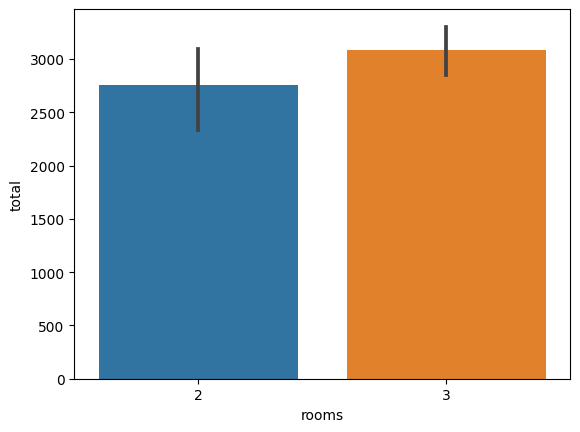

In [ ]:
sns.barplot(agg_bath_rooms_price, x = 'rooms', y = 'total');

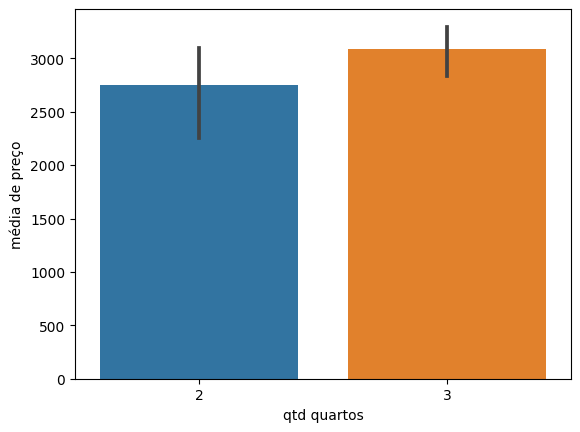

In [ ]:
# mudando o nome dos eixos
graph = sns.barplot(agg_bath_rooms_price, x = 'rooms', y = 'total');
graph.set(xlabel = 'qtd quartos', ylabel = 'média de preço');

Plotando-se um gráfico de barras do preço pela quantidade de banheiros,

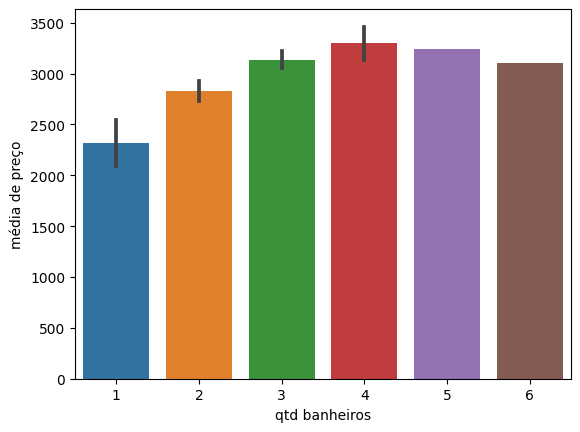

In [ ]:
graph = sns.barplot(agg_bath_rooms_price, x = 'bathroom', y = 'total');
graph.set(xlabel = 'qtd banheiros', ylabel = 'média de preço');

Plotando-se um histograma da coluna 'area' do nosso dataset 'aluguel_casa',

In [ ]:
agg_area = aluguel_casa['area']

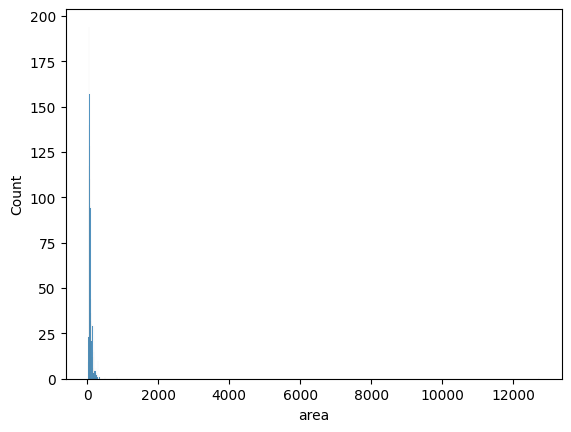

In [ ]:
sns.histplot(data = agg_area);

Como é possível perceber a partir do gráfico acima, a maior parte dos imóveis tem áreas bem menores que 2000 e tem-se pouquíssimos casos onde a área supera este valor. Por isso o gráfico fica parecendo como se tivesse apenas um aglomerado pequeno de linhas. Isto também pode ser observado com a análise do desvio padrão da área em comparação a média, como é muito maior, isto indica essa dispersão muito grande dos dados.

Para melhor analisar os dados da coluna 'area', filtrou-se seus dados para valores menores ou iguais a 100,

In [ ]:
agg_area = agg_area[(agg_area<=100)]

In [ ]:
agg_area

1        64
3        73
7        55
8        82
15       56
       ... 
6056    100
6058     72
6059     59
6075     50
6079     60
Name: area, Length: 1064, dtype: int64

In [ ]:
agg_area.describe()

count    1064.000000
mean       69.641917
std        15.962461
min        30.000000
25%        57.000000
50%        69.000000
75%        80.000000
max       100.000000
Name: area, dtype: float64

Plotando-se um novo histrograma,

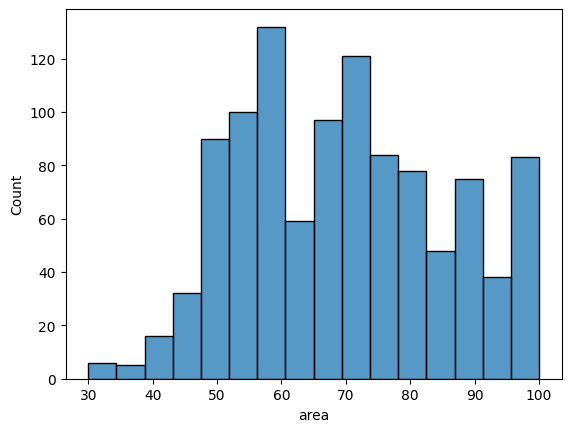

In [ ]:
sns.histplot(data = agg_area);

Agora, analisando o gráfico acima, percebe-se uma maior frequência de imóveis com áreas entre 50 e 60 metros quadrados e temos pouquíssimos casos com áreas menores que 50. Portanto, é plausível afimar que a grande maioria dos casos de imóveis disponíveis para alugar em Porto ou Barcelona e que atendem as premissas do projeto, tem áreas entre 50 e 100 metros quadrados.

Avaliou-se agora o histograma do preço, filtrado por cidade,

In [ ]:
agg_city_price = agg_city_price.reset_index()
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


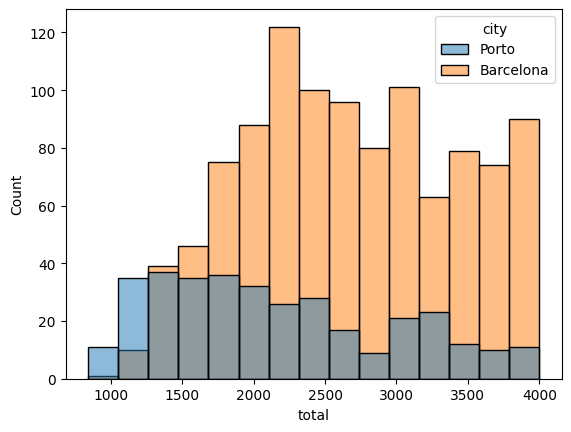

In [ ]:
sns.histplot(data = aluguel_casa, x = 'total', hue = 'city');   # o arguemento "hue" é usado justamente para segmentar o histrograma dos preços em função de alguma outra coluna
                                                                # neste caso, segmentamos por cidade (hue = 'city')

Analisando o gráfico acima, percebe-se que a frequência de imóveis com aluguel mais barato é maior na cidade do Porto em comparação a Barcelona. Por outro lado, conforme o preço do aluguel aumenta, a variedade de imóveis também cresce em Barcelona, o que não ocorre na cidade do Porto.

Com esta análise, levando em consideração também o valor de preço médio de aluguel calculado anteriormente, concluímos que é mais fácil achar imóveis mais baratos, e que atendem as premissas do negócio, na cidade do Porto do que em Barcelona.

## Selecionando o apartamento (conclusão do Case)

Como visto anteriormente, a cidade do Porto tem mais opções com imóveis mais baratos. E, sabe-se que o casal tem o preço gasto total como uma das suas prioridades, filtrou-se o dataset para apresentar somente as opções disponíveis em Porto.

In [ ]:
aluguel_casa = aluguel_casa[(aluguel_casa['city'] == 'Porto')]

In [ ]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010.0,584.0,46.0,3640.0
28,28,Porto,150,3,2,2,13,accept,not furnished,1370,1800.0,250.0,23.0,3443.0
36,36,Porto,94,3,3,2,1,accept,not furnished,750,2200.0,192.0,28.0,3170.0


Avaliando-se a distribuição da quantidade de imóveis disponíveis conforme o andar,

In [ ]:
aluguel_casa['floor'].value_counts()

-     77
1     52
3     51
2     31
4     26
7     20
5     16
6     13
11    11
9      9
8      7
10     6
12     6
15     5
13     4
17     3
16     2
19     1
18     1
14     1
51     1
Name: floor, dtype: int64

Criou-se um agrupamento dos preços médios dos apartamentos por andar,

In [ ]:
agg_floor_price = aluguel_casa.groupby(by = 'floor')['total'].agg('mean').reset_index()

Plotando-se um gráfico de barras deste agrupamento,

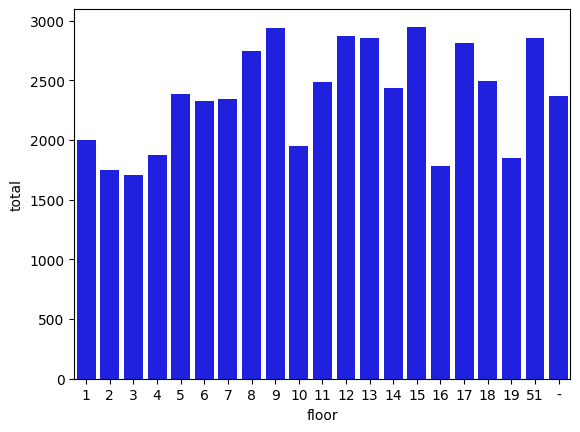

In [ ]:
sns.barplot(data = agg_floor_price, x = 'floor', y= 'total', color = 'blue');

Sabe-se que o cliente deseja apartamentos em andares mais altos pois valoriza mais o imóvel. Com isso, avaliando o gráfico acima percebe-se que os apartamentos do décimo sexto andar tem preços consideravelmente menores que os demais de andares mais altos e também apresenta um preço relativamente Ok se comparado a andares menores.

Portanto, analisou-se então somente os apartamentos do décimo sexto andar,

In [ ]:
sixteenth_floor = aluguel_casa[(aluguel_casa['floor'] == 16)]
sixteenth_floor.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900.0,61.0,12.0,1523.0
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200.0,89.0,16.0,2035.0


A partir disso, tem-se dois 'finalistas'. O primeiro apresenta área maior, não tem vaga de garagem mas tem um preço total menor. O segundo é mais caro, é menor mas tem duas vagas de garagem. Importante destacar que ambos os dois se encaixam em todas as premissas de negócio (aceitam animais, tem de 2 a 3 quartos, o preço total é menor ou igual a 4000 euros e estão em um andar mais elevado). Portanto, cabe agora ao cliente decidir qual mais o satisfaz.

Supondo que o cliente não tem carro, ele então seleciona o apartamento com índice 1843, pois é o que mais se encaixa sem sua realidade. Se o casal tiver veículo, então é mais aconselhável escolher o apartamento com índice 5175.